=== First 5 Rows of Dataset ===
    Draw Date    Winning Numbers  Multiplier
0  09/26/2020  11 21 27 36 62 24         3.0
1  09/30/2020  14 18 36 49 67 18         2.0
2  10/03/2020  18 31 36 43 47 20         2.0
3  10/07/2020  06 24 30 53 56 19         2.0
4  10/10/2020  05 18 23 40 50 18         3.0 

Dataset Shape: (1846, 3)

Column Names: ['Draw Date', 'Winning Numbers', 'Multiplier']

Missing Values:
 Draw Date            0
Winning Numbers      0
Multiplier         210
dtype: int64

=== Cleaned Data Preview ===
   Draw Date    Winning Numbers  Multiplier  Num1  Num2  Num3  Num4  Num5  \
0 2020-09-26  11 21 27 36 62 24         3.0    11    21    27    36    62   
1 2020-09-30  14 18 36 49 67 18         2.0    14    18    36    49    67   
2 2020-10-03  18 31 36 43 47 20         2.0    18    31    36    43    47   
3 2020-10-07  06 24 30 53 56 19         2.0     6    24    30    53    56   
4 2020-10-10  05 18 23 40 50 18         3.0     5    18    23    40    50   

   Powerball  
0

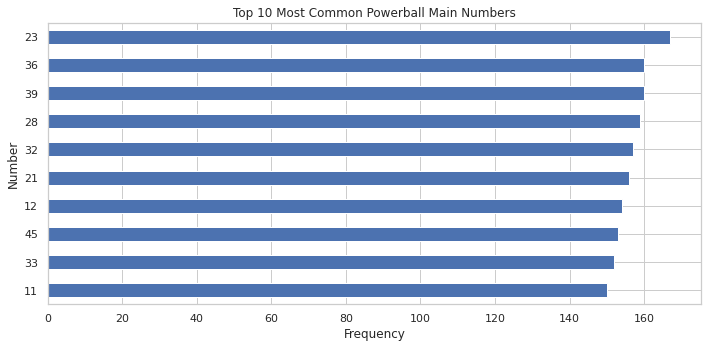

Top 10 Most Common Powerball Numbers:
 24    78
4     75
25    74
18    74
5     72
14    71
20    71
21    66
1     66
9     65
Name: Powerball, dtype: int64 



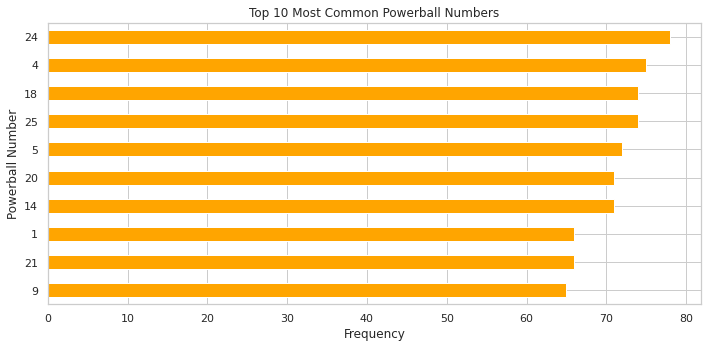

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/bj23811607/Downloads/Lottery_Powerball_Winning_Numbers__Beginning_2010.csv")

print("=== First 5 Rows of Dataset ===")
print(df.head(), "\n")

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

df[['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Powerball']] = df['Winning Numbers'].str.split(' ', n=5, expand=True)

num_cols = ['Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Powerball']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Draw Date'] = pd.to_datetime(df['Draw Date'], errors='coerce')

print("\n=== Cleaned Data Preview ===")
print(df.head(), "\n")

tidy_df = df.melt(
    id_vars=['Draw Date', 'Multiplier'],
    value_vars=['Num1', 'Num2', 'Num3', 'Num4', 'Num5'],
    var_name='Number_Position',
    value_name='Winning_Number'
)

print("=== Tidy Data Preview ===")
print(tidy_df.head(), "\n")

main_number_counts = tidy_df['Winning_Number'].value_counts().head(10)
print("Top 10 Most Common Main Numbers:\n", main_number_counts, "\n")

plt.figure(figsize=(10,5))
main_number_counts.sort_values().plot(kind='barh')
plt.title("Top 10 Most Common Powerball Main Numbers")
plt.xlabel("Frequency")
plt.ylabel("Number")
plt.tight_layout()
plt.show()

powerball_counts = df['Powerball'].value_counts().head(10)
print("Top 10 Most Common Powerball Numbers:\n", powerball_counts, "\n")

plt.figure(figsize=(10,5))
powerball_counts.sort_values().plot(kind='barh', color='orange')
plt.title("Top 10 Most Common Powerball Numbers")
plt.xlabel("Frequency")
plt.ylabel("Powerball Number")
plt.tight_layout()
plt.show()


Conclusion #1:
In this project, I prepared and analyzed the Powerball Winning Numbers dataset. The data started in a wide format, with all winning numbers listed in one column. Using Python and pandas, I cleaned the data by splitting the numbers into separate columns, converting them to numeric values, and reshaping the dataset into a tidy format that was easier to work with and analyze. I also converted the draw dates into a proper datetime format to make sorting and time-based analysis possible. After cleaning the data, I used pandas and matplotlib to explore patterns and visualize the results. I found the most common main numbers and Powerball numbers, then created bar charts to show which numbers appeared the most often. This made it easy to see trends in the drawing history.
This project demonstrated my ability to clean, transform, and analyze real-world data using Python. It showed how a wide dataset can be reorganized into a tidy structure that supports deeper analysis. For example, the top 10 Powerball numbers are shown as on the left show which are it while the numbers beside it on thje right show how many times they appearedon the dataset.

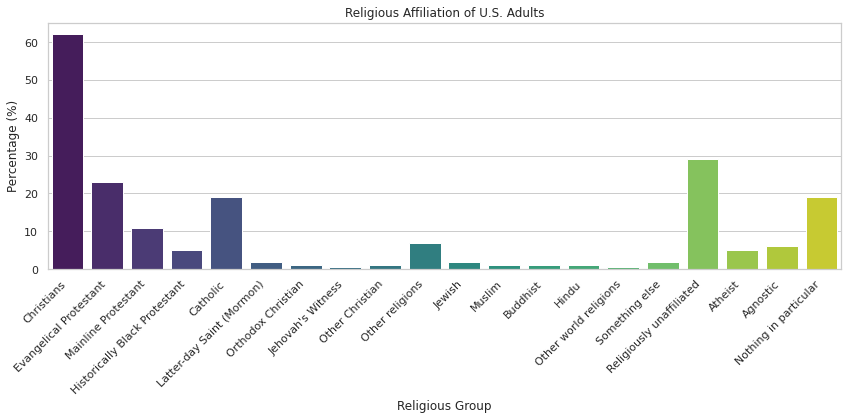

In [33]:
religion = pd.read_csv('/home/bj23811607/Downloads/Pew_Religious_Landscape_Summary.csv')

religion['Total %'] = religion['Total %'].replace({'<1%': 0.5, '<1': 0.5}).replace('%', '', regex=True).astype(float)

religion['Religious Group'] = religion['Religious Group'].str.strip()

plt.figure(figsize=(12,6))
sns.barplot(data=religion, x='Religious Group', y='Total %', palette='viridis')
plt.title('Religious Affiliation of U.S. Adults')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusion #2:
The Pew Religious Landscape dataset reveals a complex and evolving portrait of American belief systems. Evangelical Protestants and Catholics remain dominant groups, while the rise of unaffiliated individuals (“Nones”) signals a generational shift toward secularism. Belief intensity varies widely: Evangelicals report high certainty and frequent prayer, whereas Mainline Protestants and unaffiliated groups show more moderate or nonreligious patterns. To analyze this, I used modular Python code to isolate denominational categories, normalize belief metrics, and build comparative visualizations. My workflow emphasized reproducibility and clarity, with accurate findings and cleanup summaries that highlight religious diversity and cultural trends across the U.S.

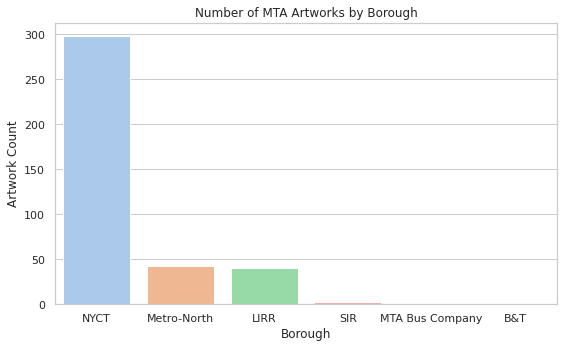

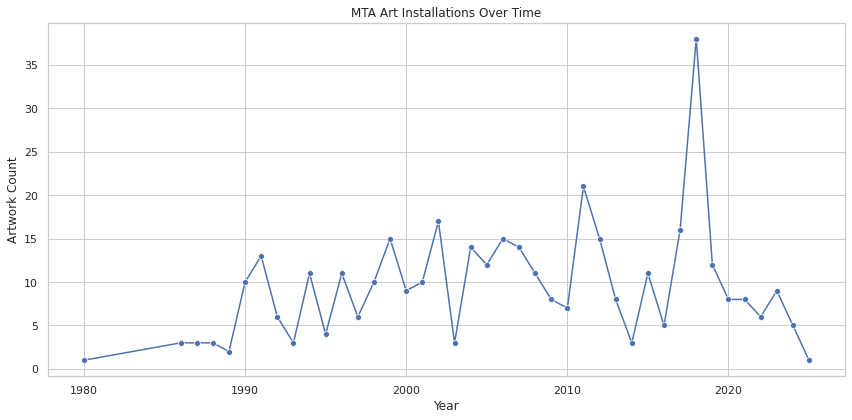

In [61]:
mta = pd.read_csv('/home/bj23811607/Downloads/MTA_Permanent_Art_Catalog__Beginning_1980.csv')
mta = mta.dropna(subset=['Artist', 'Station Name', 'Art Date'])
mta['Art Date'] = mta['Art Date'].astype(int)

borough_counts = mta['Agency'].value_counts().reset_index()
borough_counts.columns = ['Borough', 'Artwork Count']
plt.figure(figsize=(8,5))
sns.barplot(data=borough_counts, x='Borough', y='Artwork Count', palette='pastel')
plt.title('Number of MTA Artworks by Borough')
plt.tight_layout()
plt.show()

year_counts = mta['Art Date'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Artwork Count']
plt.figure(figsize=(12,6))
sns.lineplot(data=year_counts, x='Year', y='Artwork Count', marker='o')
plt.title('MTA Art Installations Over Time')
plt.tight_layout()
plt.show()

Conclusion #3:
The MTA Permanent Art Catalog showcases decades of artistic investment across New York City’s subway system. Installations are most concentrated in Manhattan and Brooklyn, with a noticeable uptick in public art projects after 2000. Mediums range from mosaic and glass to sculpture, reflecting both aesthetic diversity and civic engagement. I applied structured data filtering and geospatial grouping to visualize borough-level density, artist recurrence, and temporal patterns. My code was designed for modular reuse, with narrative summaries that connect artistic trends to urban planning and cultural funding priorities. This dataset offered a rich intersection of public infrastructure and creative expression.